# seaborn

Заказчик попросил ответить на несколько вопросов:

- Как изменяются доходы со временем?
- Падает ли количество кредитов в зависимости от количества детей у заёмщика?
- Влияет ли образование на уровень дохода и наличие задолженности?
- Различается ли общий доход должников и ответственных заёмщиков?
- Какие закономерности можно обнаружить в столбце с трудовым стажем?


In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем данные
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выполним предобработку: 

- избавимся от аномальных значений в столбце с количеством детей,
- приведём все значения в столбце с образованием к нижнему регистру,
- заменим значения `1` и `0` в столбце с задолженностью на более понятные,
- в столбце со стажем заменим все отрицательные значения на положительные.

In [2]:
# избавляемся от аномальных значений в столбце с количеством детей
data = data.loc[(data['children'] != -1) & (data['children'] != 20)]
# столбец с образованием приводим к нижнему регистру
data['education'] = data['education'].str.lower()
# столбец с меткой о задолженности заменяем на более читаемый
data['debt'] = data['debt'].apply(lambda x: 'должник' if x == 1 else 'не должник')
# меняем в стаже все отрицательные числа на положительные
data['days_employed'] = data['days_employed'].abs()

### Распределение доходов

Ответим на вопрос об изменении доходов. Распределение лучше всего смотреть на гистограмме. В библиотеке `seaborn` есть подходящий метод — `histplot()`. 
 Для настройки стиля графика и некоторых других параметров будем использовать `matplotlib`, а сам график построим с помощью `seaborn`.

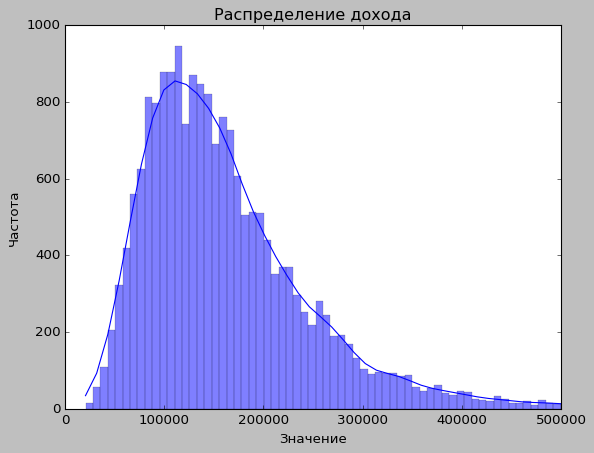

In [3]:
# назначаем классический стиль для графика с помощью matplotlib
plt.style.use('classic')
# строим гистограмму для столбца total_income, добавив график кривой KDE
sns.histplot(x='total_income', data=data, kde=True)
# ограничиваем ось X для наглядности
plt.xlim(0, 500000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода')
plt.xlabel('Значение')
plt.ylabel('Частота')
# отображаем график на экране
plt.show()

Для графика кривой KDE (от англ. kernel density estimate, «график оценки плотности ядра») понадобился один аргумент, а корзины гистограммы назначились автоматически. За остальные настройки отвечает библиотека matplotlib.

### Связь между кредитами и количеством детей

Для отображения изменений — по времени или категориям — удобно использовать линейный график. Заранее сгруппируем данные и сформируем необходимую таблицу. Стиль графика назначим средствами библиотеки seaborn.

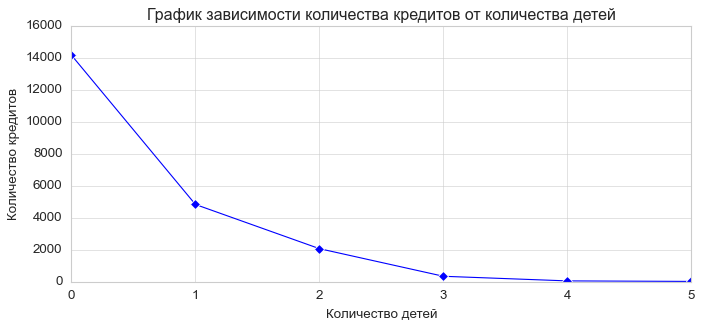

In [4]:
# готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = data.groupby('children')[['children']].count()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
# отображаем график на экране
plt.show()

График получился достаточно наглядным: видно, как падает число выданных кредитов в зависимости от числа детей в семье заёмщика. Возможно, это не связано с тем, что многодетные семьи реже берут кредиты. Скорее всего, семей без детей или с 1–2 детьми намного больше, чем многодетных. В таком случае стоит рассматривать относительные величины.

### Связь между доходом и образованием

Теперь ответим на вопрос, влияет ли образование на уровень дохода и наличие задолженности. Попробуем отразить всё на одном графике. 

Построим столбчатую диаграмму и повернём её набок. Чтобы сформировать столбцы, сгруппируем данные по категориям образования и вычислим медианный доход. Параметру `hue` метода `barplot()` передадим категории задолженности.

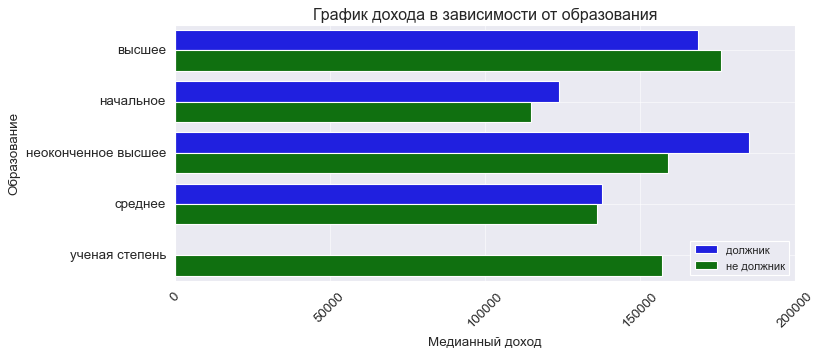

In [5]:
# группируем данные по образованию и задолженности и считаем медианный доход
data_ed = data.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()
# используем стиль dark из библиотеки seaborn
sns.set_style('dark')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще.

### Распределение доходов должников и ответственных заёмщиков

Сравним доход у должников и ответственных заёмщиков. Построим «график-скрипку» методом `violinplot()` из библиотеки `seaborn`. Такой график включает все параметры, которые показывает «ящик с усами», и отображает форму гистограммы.

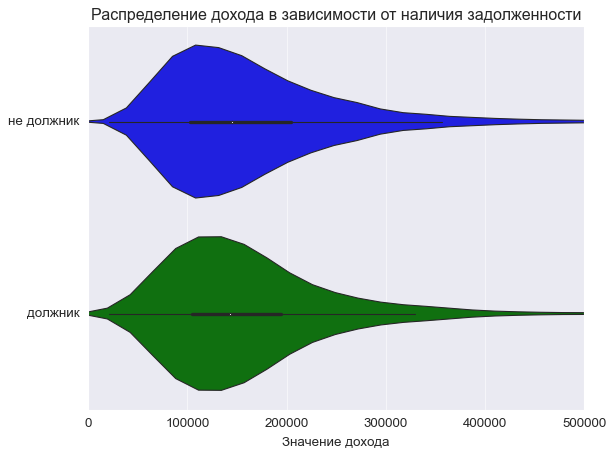

In [6]:
# применяем стиль darkgrid из библиотеки seaborn
sns.set_style('darkgrid')
# строим график violinplot средствами seaborn
sns.violinplot(x='total_income', y='debt', data=data)
# ограничиваем ось X для наглядности
plt.xlim(0, 500000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода в зависимости от наличия задолженности')
plt.xlabel('Значение дохода')
plt.ylabel(None)
# отображаем график на экране
plt.show()

Распределения похожи. Если доход и различается, то незначительно.

### Поиск закономерностей

Проанализируем данные в столбце со стажем `days_employed`. Построим график `scatter`, чтобы отобразить зависимость стажа от дохода.  Укажем несколько параметров, чтобы график получился более контрастным. 

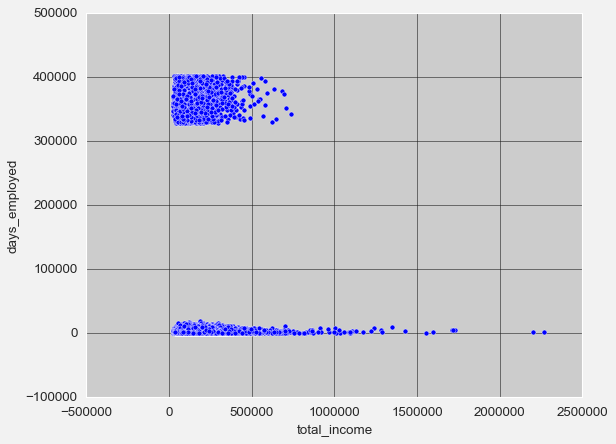

In [7]:
# вручную задаём параметры графика
sns.set_style('darkgrid',
              {'axes.facecolor': '0.8',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
# строим график scatter средствами seaborn
sns.scatterplot(x='total_income', y='days_employed', data=data)
# отображаем график на экране
plt.show()

Стала видна странность: значения трудового стажа находятся либо около нуля и небольших значений, либо в промежутке от 300000 до 400000. О таких аномалиях стоит сообщать заказчику: возможно, это ошибка выгрузки.